# Clustering NB

Clustering is the task of dividing the population or data points into a number of groups such that data points in the same groups are more similar to other data points in the same group than those in other groups. In simple words, the aim is to segregate groups with similar traits and assign them into clusters.

In [3]:
import pandas as pd 
import numpy as np
import os 
import warnings 
import seaborn as sns 
import matplotlib.pyplot as plt 

## Importing the data

In [16]:
df=pd.read_csv('C:\\Users\Kaushik\OneDrive\Ivy Data Science Notes\Machine Learning Module\Regression Datasets\BosHou.csv')

In [17]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


## Seperating target and predictor variable

In [18]:
# Keeping the target variable for future reference
TargetVariable=df['MEDV']

# Dropping the target variable to get only predictors
# We will apply PCA only on the predictors
OnlyPredictors=df.drop('MEDV', axis=1)

OnlyPredictors.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33


In [19]:
# Taking out only the Predictor variables
y=TargetVariable.values
X=OnlyPredictors.values

# Printing some sample records
print(X[0:10])

[[6.3200e-03 1.8000e+01 2.3100e+00 0.0000e+00 5.3800e-01 6.5750e+00
  6.5200e+01 4.0900e+00 1.0000e+00 2.9600e+02 1.5300e+01 3.9690e+02
  4.9800e+00]
 [2.7310e-02 0.0000e+00 7.0700e+00 0.0000e+00 4.6900e-01 6.4210e+00
  7.8900e+01 4.9671e+00 2.0000e+00 2.4200e+02 1.7800e+01 3.9690e+02
  9.1400e+00]
 [2.7290e-02 0.0000e+00 7.0700e+00 0.0000e+00 4.6900e-01 7.1850e+00
  6.1100e+01 4.9671e+00 2.0000e+00 2.4200e+02 1.7800e+01 3.9283e+02
  4.0300e+00]
 [3.2370e-02 0.0000e+00 2.1800e+00 0.0000e+00 4.5800e-01 6.9980e+00
  4.5800e+01 6.0622e+00 3.0000e+00 2.2200e+02 1.8700e+01 3.9463e+02
  2.9400e+00]
 [6.9050e-02 0.0000e+00 2.1800e+00 0.0000e+00 4.5800e-01 7.1470e+00
  5.4200e+01 6.0622e+00 3.0000e+00 2.2200e+02 1.8700e+01 3.9690e+02
  5.3300e+00]
 [2.9850e-02 0.0000e+00 2.1800e+00 0.0000e+00 4.5800e-01 6.4300e+00
  5.8700e+01 6.0622e+00 3.0000e+00 2.2200e+02 1.8700e+01 3.9412e+02
  5.2100e+00]
 [8.8290e-02 1.2500e+01 7.8700e+00 0.0000e+00 5.2400e-01 6.0120e+00
  6.6600e+01 5.5605e+00 5.0000e+

### Finding the best number of clusters based on the inertia value

C:\Users\Kaushik\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


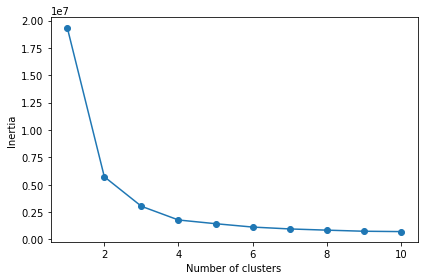

In [22]:
# Finding the best number of clusters based on the inertia value
%matplotlib inline
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
inertiaValue = []
for i in range(1, 11):
    km = KMeans(n_clusters=i, 
                init='random',
                n_init=10, 
                max_iter=300,
                tol=1e-04,
                random_state=0)
    
    km.fit(X)
    inertiaValue.append(km.inertia_)
    
plt.plot(range(1, 11), inertiaValue, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.tight_layout()
#plt.savefig('elbow.png', dpi=300)
plt.show()

### Using above graph deciding optimal number of clusters

In [23]:
# Defining the K-Means object for best number of clusters. n=3 in this case
km = KMeans(n_clusters=3, 
            init='random', 
            n_init=10, 
            max_iter=300,
            tol=1e-04,
            random_state=3)

In [25]:
# Running the clustering algorithm on the data set
predictedCluster = km.fit_predict(X)
print(predictedCluster)
print('Inertia:', km.inertia_)

[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 0 0 0 0 0 0 0 0 0 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 1 1 1 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0
 0 1 0 0 0 0 1 0 0 0 1 1 1 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 

In [26]:
df['PredictedClusterID']=predictedCluster
df.tail(10)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,PredictedClusterID
496,0.28960,0.0,9.69,0,0.585,5.390,72.9,2.7986,6,391,19.2,396.90,21.14,19.7,2
497,0.26838,0.0,9.69,0,0.585,5.794,70.6,2.8927,6,391,19.2,396.90,14.10,18.3,2
498,0.23912,0.0,9.69,0,0.585,6.019,65.3,2.4091,6,391,19.2,396.90,12.92,21.2,2
499,0.17783,0.0,9.69,0,0.585,5.569,73.5,2.3999,6,391,19.2,395.77,15.10,17.5,2
500,0.22438,0.0,9.69,0,0.585,6.027,79.7,2.4982,6,391,19.2,396.90,14.33,16.8,2
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4,2
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6,2
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9,2
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0,2
505,0.04741,0.0,11.93,0,0.573,6.030,80.8,2.5050,1,273,21.0,396.90,7.88,11.9,2


## Visualizing the clusters

No handles with labels found to put in legend.


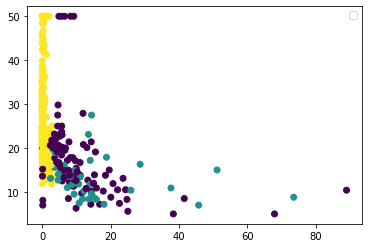

In [32]:
# create scatter plot to visualize the data
%matplotlib inline
plt.scatter(x=df['CRIM'], y=df['MEDV'], c=df['PredictedClusterID'])
plt.legend()

No handles with labels found to put in legend.


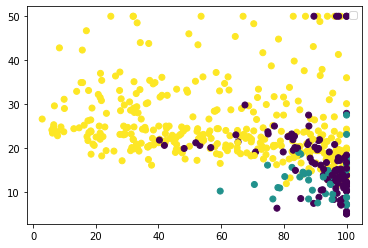

In [36]:
# create scatter plot to visualize the data
%matplotlib inline
plt.scatter(x=df['AGE'], y=df['MEDV'], c=df['PredictedClusterID'])
plt.legend()

No handles with labels found to put in legend.


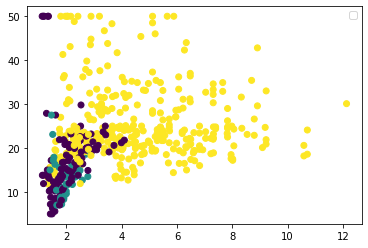

In [37]:
# create scatter plot to visualize the data
%matplotlib inline
plt.scatter(x=df['DIS'], y=df['MEDV'], c=df['PredictedClusterID'])
plt.legend()

## Hierarchical Clustering

      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  TAX  PTRATIO  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296     15.3   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242     17.8   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242     17.8   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222     18.7   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222     18.7   

        B  LSTAT  MEDV  PredictedClusterID  
0  396.90   4.98  24.0                   1  
1  396.90   9.14  21.6                   1  
2  392.83   4.03  34.7                   1  
3  394.63   2.94  33.4                   1  
4  396.90   5.33  36.2                   1  


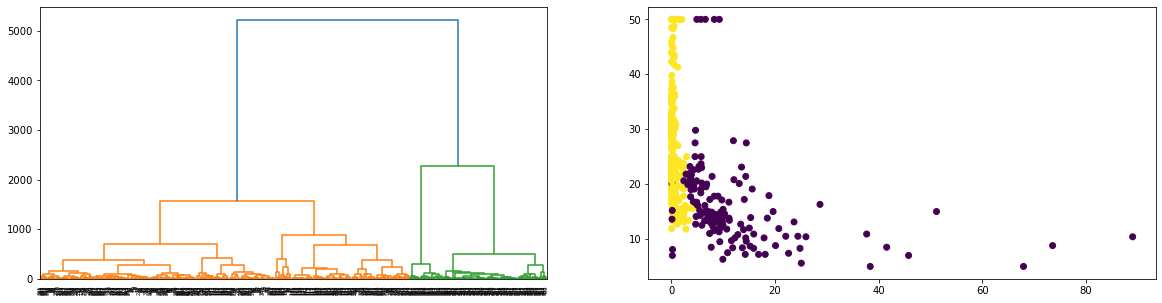

In [41]:
# Hierarchical Clustering
%matplotlib inline
import matplotlib.pyplot as plt
fig, subPlots=plt.subplots(nrows=1, ncols=2, figsize=(20,5))

# create dendrogram to find best number of clusters
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(X, method='ward'), ax=subPlots[0])


##################################################################
# Creating 3 Clusters Based on the above dendogram visually
# Bottom-Up hierarchical clustering
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters=2, affinity = 'euclidean', linkage = 'ward')

# Generating cluster id for each row using agglomerative algorithm
df['PredictedClusterID']=hc.fit_predict(X)
print(df.head())
 
# Plotting the predicted clusters
plt.scatter(x=df['CRIM'], y=df['MEDV'], c=df['PredictedClusterID'])

# Use of Linkage
# "ward" minimizes the variance of the clusters being merged.
# "average" uses the average of the distances of each observation of the two sets.
# "complete" or maximum linkage uses the maximum distances between all observations of the two sets.

In [42]:
## Finding Optimal Number of clusters using silhouette score
import numpy as np
import pandas as pd
from sklearn.metrics import silhouette_score

# Defining the list of clusters to try
n_clusters_list=np.arange(start=2, stop=10, step=1)

# Creating empty data frame to store the silhouette scores for each trials
silhouette_scores_data=pd.DataFrame()

for n_clusters_trial in n_clusters_list:
   
        
    # Generating Hierarchical clusters
    from sklearn.cluster import AgglomerativeClustering
    hc = AgglomerativeClustering(n_clusters=n_clusters_trial, affinity = 'euclidean', linkage = 'ward')
        
    if(len(np.unique(hc.fit_predict(X)))>1):
        sil_score=silhouette_score(X, hc.fit_predict(X))
    else:
        continue
    
    # Appending the result of each iteration
    silhouette_scores_data=silhouette_scores_data.append(pd.DataFrame(data=[[sil_score,n_clusters_trial]], 
                                                                          columns=["score", "Clusters"]))

In [43]:
silhouette_scores_data

,score,Clusters
0,0.691405,2
0,0.720864,3
0,0.536587,4
0,0.546427,5
0,0.477979,6
0,0.489157,7
0,0.434339,8
0,0.444746,9


In [44]:
silhouette_scores_data.sort_values(by='score', ascending=False).head(1)

,score,Clusters
0,0.720864,3


## DBSCAN
* Density-Based Spatial Clustering of Applications with Noise
* Works fast with large datasets
* Finds meaningful clusters where K-Means fails

      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  TAX  PTRATIO  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296     15.3   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242     17.8   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242     17.8   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222     18.7   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222     18.7   

        B  LSTAT  MEDV  PredictedClusterID  
0  396.90   4.98  24.0                  -1  
1  396.90   9.14  21.6                  -1  
2  392.83   4.03  34.7                  -1  
3  394.63   2.94  33.4                  -1  
4  396.90   5.33  36.2                  -1  


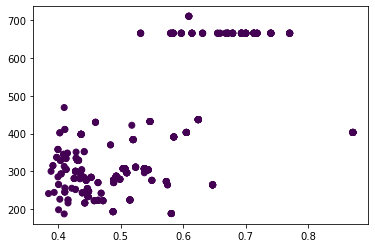

In [51]:
# DBSCAN Clustering
from sklearn.cluster import DBSCAN
db = DBSCAN(eps=0.2, min_samples=3)

# Generating cluster id for each row using DBSCAN algorithm
# -1 indicates the point is a noize, and does not belong to any cluster
# DBSCAN automatically chooses the number of clusters based on eps and min_samples
df['PredictedClusterID']=db.fit_predict(X)
print(df.head())


# Plotting the predicted clusters
plt.scatter(x=df['NOX'], y=df['TAX'], c=df['PredictedClusterID'])


# eps : float, optional
#    The maximum distance between two samples for them to be considered
#    as in the same neighborhood.

# min_samples : int, optional
#    The number of samples (or total weight) in a neighborhood for a point
#    to be considered as a core point. This includes the point itself.

## Finding Best hyperparameters for DBSCAN using Silhouette Coefficient

The Silhouette Coefficient is calculated using the mean intra-cluster distance (a) and the mean nearest-cluster distance (b) for each sample. The Silhouette Coefficient for a sample is (b - a) / max(a, b). To clarify, b is the distance between a sample and the nearest cluster that the sample is not a part of. Note that Silhouette Coefficient is only defined if number of labels is 2 <= n_labels <= n_samples - 1.

The best value of Silhouette Coefficient is 1 and the worst value is -1. Values near 0 indicate overlapping clusters. Negative values generally indicate that a sample has been assigned to the wrong cluster

In [55]:
## Finding best values of eps and min_samples
import numpy as np
import pandas as pd
from sklearn.metrics import silhouette_score

# Defining the list of hyperparameters to try
eps_list=np.arange(start=0.1, stop=0.9, step=0.01)
min_sample_list=np.arange(start=2, stop=5, step=1)

# Creating empty data frame to store the silhouette scores for each trials
silhouette_scores_data=pd.DataFrame()

for eps_trial in eps_list:
    for min_sample_trial in min_sample_list:
        
        # Generating DBSAN clusters
        db = DBSCAN(eps=eps_trial, min_samples=min_sample_trial)
        
        if(len(np.unique(db.fit_predict(X)))>1):
            sil_score=silhouette_score(X, db.fit_predict(X))
        else:
            continue
        trial_parameters="eps:" + str(eps_trial.round(1)) +" min_sample :" + str(min_sample_trial)
        
        silhouette_scores_data=silhouette_scores_data.append(pd.DataFrame(data=[[sil_score,trial_parameters]], 
                                                                          columns=["score", "parameters"]))

In [54]:
# Finding out the best hyperparameters with highest Score
silhouette_scores_data.sort_values(by='score', ascending=False).head(1)

,score,parameters
0,-0.166513,eps:0.4 min_sample :2
